# Perceptron from scratch

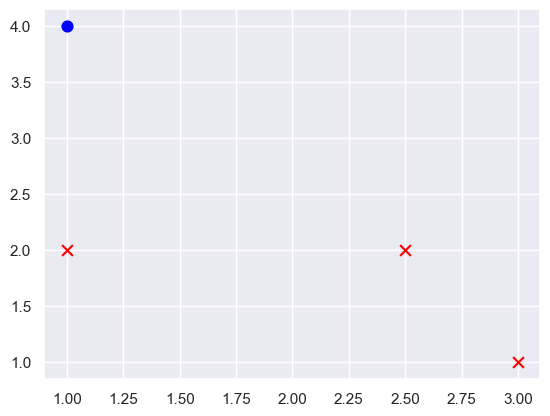

In [5]:
import random 
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# training dataset [[1, x_1, x_2, y], ...]
# dunque d=2, siamo in R^2
S = [[1, 3, 1, random.randrange(-1,2,2)], [1, 1, 2, random.randrange(-1,2,2)], 
     [1, 2.5, 2, random.randrange(-1,2,2)], [1, 1, 4, random.randrange(-1,2,2)]]

#Vediamo la disposizione dei punti con le label associate... Sono linearmente separabili?

ascisse_circle = [s[1] for s in S if(s[3]==1)]
ordinate_circle = [s[2] for s in S if(s[3]==1)]

ascisse_cross = [s[1] for s in S if(s[3]==-1)]
ordinate_cross = [s[2] for s in S if(s[3]==-1)]

plt.scatter(ascisse_circle, ordinate_circle, s=60, color='blue', marker='o')
plt.scatter(ascisse_cross, ordinate_cross, s=60, color='red', marker='x')

In [6]:
# numero massimo di iterazioni
max_iter = 1000
num_iter = max_iter

# vettore parametri modello w = [b, w_1, w_2]
w = [0, 0, 0]

# ripeti il ciclo for fino a che non ci sono più errori (o si raggiunge il massimo numero di iterazioni)
while True:
    
    #print("num iterazioni = ", num_iter)
    num_errors = 0
    
    # per ogni elemento del dataset
    for elem in S:

        # estrai la label dell'elemento
        y = elem[3]

        # estrai le coordindate dell'elemento
        x = elem[:3]

        # calcola yi⟨w(t), xi⟩ (vedi slide)
        check = y*((w[0] * x[0]) + (w[1] * x[1]) + (w[2] * x[2]))

        if (check<=0):
            # aggiorna modello
            w[0] = w[0] + (x[0] * y)
            w[1] = w[1] + (x[1] * y)
            w[2] = w[2] + (x[2] * y)
            num_errors += 1
            break
        
    # aggiorna iterazioni
    num_iter -= 1

    # condizioni di uscita dal ciclo while
    if (num_errors == 0) or (num_iter == 0):
        break

print("Interazioni necessarie:", max_iter - num_iter)
print("Parametri del modello:", w)

Interazioni necessarie: 12
Parametri del modello: [-3, -5, 3]


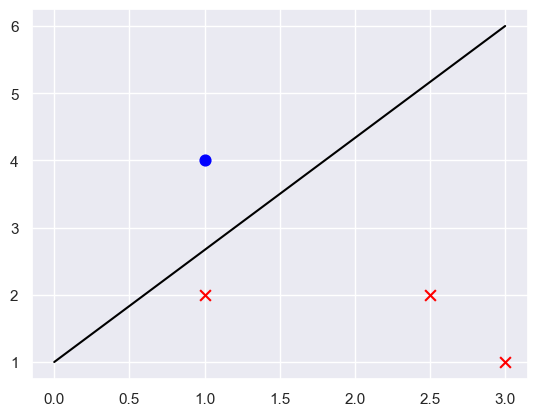

In [7]:
plt.scatter(ascisse_circle, ordinate_circle, s=60, color='blue', marker='o')
plt.scatter(ascisse_cross, ordinate_cross, s=60, color='red', marker='x')

ascisse = np.linspace(0, 3, 1000)
# w_0 + w_1*x + w_2*y = 0 -> y = (-w_1*x - w_0)/w_2
ordinate = [(-w[1]*x - w[0])/w[2] for x in ascisse]

plt.plot(ascisse, ordinate, linestyle='solid', color='black')